<a href="https://colab.research.google.com/github/isacki/ai3project/blob/master/PCA%26LR_deaths_million.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/isacki/ai3project/blob/master/explore_nans.ipynb)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
import os

Download fixed data from a shared folder so that we all use the same data.

In [14]:
# Download data
import gdown
work_dir = os.path.abspath("/content")
work_file = os.path.join(work_dir, "owid-covid-data.csv")
data_file_link = "https://drive.google.com/uc?id=1zWIKCrWWeEGjEe5Q88i21Lu9Cet_TzdQ"
gdown.download(data_file_link, work_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zWIKCrWWeEGjEe5Q88i21Lu9Cet_TzdQ
To: /content/owid-covid-data.csv
5.71MB [00:00, 60.3MB/s]


'/content/owid-covid-data.csv'

In [15]:
infname = "owid-covid-data.csv"
indata = pd.read_csv(infname)
type(indata)
indata.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Basic information about the dataset:

In [16]:
print("Shape of original data: " + str(indata.shape))
print("Columns of original data: ")
print(indata.columns)

Shape of original data: (31705, 34)
Columns of original data: 
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')


In [17]:
#20-7-2020 data
df=indata
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
#print(df["date"])
df = df.loc[df['date'] == '2020-07-10']
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
182,AFG,Asia,Afghanistan,2020-07-10,33908.0,255.0,957.0,20.0,871.036,6.550,24.584,0.514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83
317,ALB,Europe,Albania,2020-07-10,3188.0,82.0,83.0,0.0,1107.791,28.494,28.841,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.26,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
516,DZA,Africa,Algeria,2020-07-10,17808.0,460.0,988.0,10.0,406.102,10.490,22.531,0.228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.07,43851043.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88
646,AND,Europe,Andorra,2020-07-10,855.0,0.0,52.0,0.0,11065.812,0.000,673.008,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.67,77265.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73
768,AGO,Africa,Angola,2020-07-10,396.0,10.0,22.0,1.0,12.049,0.304,0.669,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.39,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15


In [9]:
#remove nans
#percent nulls
df["location"].drop_duplicates()
workdata=df.drop(columns=['continent','date','iso_code','total_tests', 'new_tests','total_tests_per_thousand','new_deaths','new_cases','new_deaths_per_million','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_units','extreme_poverty','handwashing_facilities','stringency_index','female_smokers','male_smokers','hospital_beds_per_thousand','diabetes_prevalence'])
workdata = workdata[workdata.location != 'World']
#(100*workdata.isnull().sum())/len(workdata)
workdata
workdata.isnull().sum(axis=1).tolist()
##remove all null rows? - only 17 remaining
newdata=workdata[workdata.isnull().sum(axis=1) == 0]
len(newdata)
newdata.head()

,location,total_cases,total_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,life_expectancy
182,Afghanistan,33908.0,957.0,871.036,6.550,24.584,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,64.83
317,Albania,3188.0,83.0,1107.791,28.494,28.841,2877800.0,104.871,38.0,13.188,8.643,11803.431,304.195,78.57
516,Algeria,17808.0,988.0,406.102,10.490,22.531,43851043.0,17.348,29.1,6.211,3.857,13913.839,278.364,76.88
768,Angola,396.0,22.0,12.049,0.304,0.669,32866268.0,23.890,16.8,2.405,1.362,5819.495,276.045,61.15
1009,Antigua and Barbuda,73.0,3.0,745.446,0.000,30.635,97928.0,231.845,32.1,6.933,4.631,21490.943,191.511,77.02


In [18]:
from sklearn.model_selection import train_test_split
#newdata.columns
#'location', 'total_cases', 'new_cases', 'total_deaths', 'total_cases_per_million', 'new_cases_per_million','total_deaths_per_million', 'new_deaths_per_million', 'population','population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       #'gdp_per_capita', 'cardiovasc_death_rate', 'life_expectancy']

#targets - total_deaths
vars=newdata.drop(columns=['total_deaths','total_deaths_per_million','location'])
targs=newdata[['total_deaths','total_deaths_per_million']]
trainx, testx, trainy, testy = train_test_split(vars, targs, test_size=0.2, random_state=0)


[0.39394641 0.19073313 0.12030418 0.09179114 0.07059747 0.05309966
 0.0398414 ]
[0.39394641 0.58467953 0.70498371 0.79677485 0.86737232 0.92047198
 0.96031338]


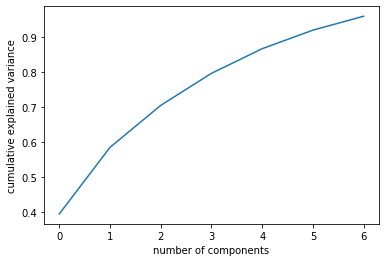

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
scaler = StandardScaler() 
trainx_scale = scaler.fit_transform(trainx)
testx_scale = scaler.fit_transform(testx)

pca = PCA(.95)
pca.fit(trainx_scale)

print(pca.explained_variance_ratio_)
#plt.bar(np.arange(11), pca.explained_variance_ratio_[0:55])

print(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [21]:
train_fit = pca.transform(trainx_scale)
test_fit = pca.transform(testx_scale)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression() 
regressor.fit(train_fit, trainy['total_deaths_per_million'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
yhat=regressor.predict(test_fit)
regressor.score(test_fit, testy['total_deaths_per_million'])
#logisticRegr.score(testy['total_deaths'],yhat)
  
#log_loss(testy['total_deaths'],yhat)

0.47524078100362305

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testy['total_deaths_per_million'], yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(testy['total_deaths_per_million'], yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testy['total_deaths_per_million'], yhat)))

Mean Absolute Error: 67.38036640004478
Mean Squared Error: 10294.11496668269
Root Mean Squared Error: 101.45991803013982
